# Titanic Data Analysis

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

In [322]:
titanic_dataset = pd.read_csv("C:\\Users\\RAVI TEJA\\Documents\\Data Sets\\titanic.csv")

In [323]:
titanic_dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [324]:
titanic_dataset.shape

(1310, 14)

In [325]:
titanic_dataset.describe(include = "all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [326]:
titanic_dataset.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [327]:
titanic_dataset.duplicated().any()

False

In [328]:
titanic_dataset.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [329]:
for i in titanic_dataset.columns:
    print(i)
    print(len(titanic_dataset[i].unique()),"        ",titanic_dataset[i].dtypes)

pclass
4          float64
survived
3          float64
name
1308          object
sex
3          object
age
99          float64
sibsp
8          float64
parch
9          float64
ticket
930          object
fare
282          float64
cabin
187          object
embarked
4          object
boat
28          object
body
122          float64
home.dest
370          object


<AxesSubplot:>

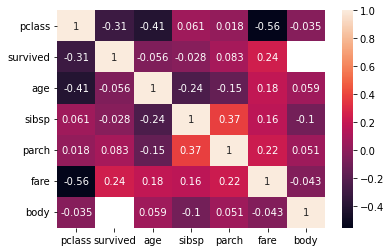

In [330]:
sns.heatmap(titanic_dataset.corr(),annot = True)

In [331]:
titanic_dataset_1 = titanic_dataset.drop(["boat","body","home.dest"], axis = 1)

In [332]:
titanic_dataset_1.shape

(1310, 11)

In [333]:
titanic_dataset_1.age.fillna(titanic_dataset_1.age.median(),inplace = True)

In [334]:
titanic_dataset_1.isna().sum()

pclass         1
survived       1
name           1
sex            1
age            0
sibsp          1
parch          1
ticket         1
fare           2
cabin       1015
embarked       3
dtype: int64

In [335]:
titanic_dataset_1 = titanic_dataset_1.drop(["cabin"], axis = 1)

In [336]:
titanic_dataset_1["embarked"].fillna(titanic_dataset_1["embarked"].mode(),inplace = True)
titanic_dataset_1["fare"].fillna(titanic_dataset_1["fare"].mode(),inplace = True)
titanic_dataset_1.dropna(inplace = True)
titanic_dataset_1.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [337]:
titanic_dataset_1.shape

(1306, 10)

In [338]:
titanic_dataset_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [339]:
titanic_dataset_1.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [340]:
titanic_dataset_1['FamilySize'] = titanic_dataset_1['sibsp'] + titanic_dataset_1['parch'] + 1
titanic_dataset_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,4.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,4.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,4.0


In [341]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

titanic_dataset_1['Title'] = titanic_dataset_1['name'].apply(get_title)
titanic_dataset_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize,Title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1.0,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,4.0,Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,4.0,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,4.0,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,4.0,Mrs


In [342]:
len(titanic_dataset_1['Title'].unique())

18

In [343]:
titanic_dataset_1['Title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [344]:
for title in titanic_dataset_1['Title'].unique():
    print(title, " ---- ",(((titanic_dataset_1['Title'] == title) == True).sum()))

Miss  ----  259
Master  ----  61
Mr  ----  756
Mrs  ----  196
Col  ----  4
Mme  ----  1
Dr  ----  8
Major  ----  2
Capt  ----  1
Lady  ----  1
Sir  ----  1
Mlle  ----  2
Dona  ----  1
Jonkheer  ----  1
Countess  ----  1
Don  ----  1
Rev  ----  8
Ms  ----  2


In [345]:

titanic_dataset_1['Title'] = titanic_dataset_1['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_dataset_1['Title'] = titanic_dataset_1['Title'].replace('Mlle', 'Miss')
titanic_dataset_1['Title'] = titanic_dataset_1['Title'].replace('Ms', 'Miss')
titanic_dataset_1['Title'] = titanic_dataset_1['Title'].replace('Mme', 'Mrs')

In [346]:
titanic_dataset_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize,Title
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1.0,Miss
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,4.0,Master
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,4.0,Miss
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,4.0,Mr
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,4.0,Mrs


<AxesSubplot:>

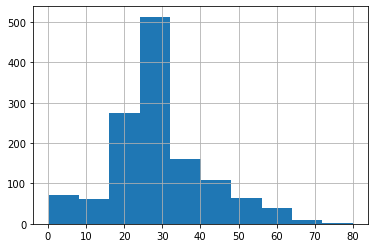

In [347]:
titanic_dataset_1['age'].hist()

In [348]:
titanic_dataset_1['Age_bin'] = pd.cut(titanic_dataset_1['age'], bins=[0,12,20,45,90], labels=['Children','Teenage','Adult','Elder'])

0.0 512.3292


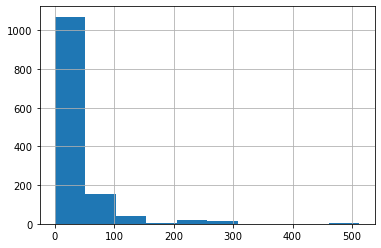

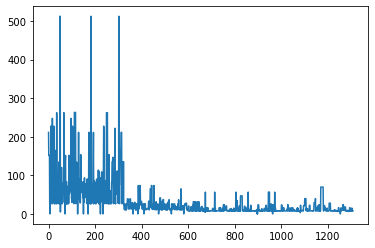

In [349]:
print(titanic_dataset_1["fare"].min(),titanic_dataset_1["fare"].max())
titanic_dataset_1['fare'].hist()
plt.show()
titanic_dataset_1['fare'].plot()
plt.show()

In [350]:
titanic_dataset_1['Fare_bin'] = pd.cut(titanic_dataset_1['fare'], bins=[0,50,100,150,200,250,520], labels=['very_low_fare','low_fare',
                                                                                      'average_fare','above_average_fare','high_fare','very_high_fare'])

In [351]:
print(titanic_dataset_1.shape)
titanic_dataset_1.head()

(1306, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,FamilySize,Title,Age_bin,Fare_bin
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1.0,Miss,Adult,high_fare
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,4.0,Master,Children,above_average_fare
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,4.0,Miss,Children,above_average_fare
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,4.0,Mr,Adult,above_average_fare
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,4.0,Mrs,Adult,above_average_fare


In [352]:
titanic_dataset_1.drop(['age','fare','name','ticket'], axis=1, inplace = True)

In [353]:
titanic_dataset_2 = pd.get_dummies(titanic_dataset_1, columns = ["sex","Title","Age_bin","embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Embark_type","Fare_type"])

In [354]:
print(titanic_dataset.shape)
titanic_dataset_2.head()

(1310, 14)


,pclass,survived,sibsp,parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Elder,Embark_type_C,Embark_type_Q,Embark_type_S,Fare_type_very_low_fare,Fare_type_low_fare,Fare_type_average_fare,Fare_type_above_average_fare,Fare_type_high_fare,Fare_type_very_high_fare
0,1.0,1.0,0.0,0.0,1.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1.0,1.0,1.0,2.0,4.0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1.0,0.0,1.0,2.0,4.0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,1.0,0.0,1.0,2.0,4.0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,1.0,0.0,1.0,2.0,4.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [355]:
titanic_dataset_2.dtypes

pclass                          float64
survived                        float64
sibsp                           float64
parch                           float64
FamilySize                      float64
Sex_female                        uint8
Sex_male                          uint8
Title_Master                      uint8
Title_Miss                        uint8
Title_Mr                          uint8
Title_Mrs                         uint8
Title_Rare                        uint8
Age_type_Children                 uint8
Age_type_Teenage                  uint8
Age_type_Adult                    uint8
Age_type_Elder                    uint8
Embark_type_C                     uint8
Embark_type_Q                     uint8
Embark_type_S                     uint8
Fare_type_very_low_fare           uint8
Fare_type_low_fare                uint8
Fare_type_average_fare            uint8
Fare_type_above_average_fare      uint8
Fare_type_high_fare               uint8
Fare_type_very_high_fare          uint8


In [356]:
le_1 = LabelEncoder()
for i in titanic_dataset_2.columns:
    if (titanic_dataset_2[i].dtypes) == "float64":
        titanic_dataset_2[i] = le_1.fit_transform(titanic_dataset_2[i])

In [357]:
titanic_dataset_2.head()

,pclass,survived,sibsp,parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Elder,Embark_type_C,Embark_type_Q,Embark_type_S,Fare_type_very_low_fare,Fare_type_low_fare,Fare_type_average_fare,Fare_type_above_average_fare,Fare_type_high_fare,Fare_type_very_high_fare
0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,1,2,3,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,2,3,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,2,3,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,2,3,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


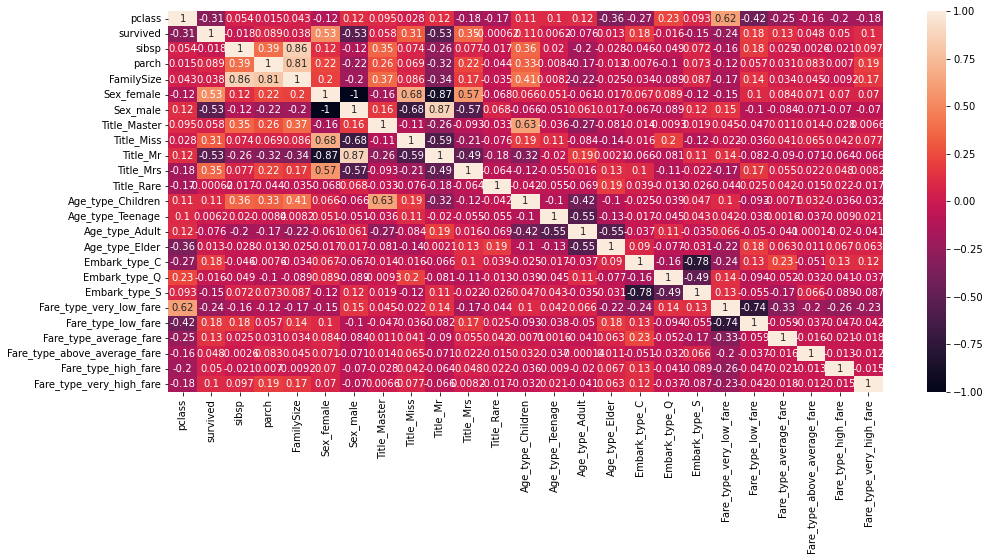

In [358]:
plt.figure(figsize = (16,7))
sns.heatmap(titanic_dataset_2.corr(),annot = True)
plt.show()

In [359]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [360]:
titanic_dataset_3 = titanic_dataset_1

In [361]:
titanic_dataset_3.head()

,pclass,survived,sex,sibsp,parch,embarked,FamilySize,Title,Age_bin,Fare_bin
0,1.0,1.0,female,0.0,0.0,S,1.0,Miss,Adult,high_fare
1,1.0,1.0,male,1.0,2.0,S,4.0,Master,Children,above_average_fare
2,1.0,0.0,female,1.0,2.0,S,4.0,Miss,Children,above_average_fare
3,1.0,0.0,male,1.0,2.0,S,4.0,Mr,Adult,above_average_fare
4,1.0,0.0,female,1.0,2.0,S,4.0,Mrs,Adult,above_average_fare


In [362]:
for i in titanic_dataset_3.columns:
    titanic_dataset_3[i] = le.fit_transform(titanic_dataset_3[i])

In [363]:
titanic_dataset_3.head()

,pclass,survived,sex,sibsp,parch,embarked,FamilySize,Title,Age_bin,Fare_bin
0,0,1,0,0,0,2,0,1,0,2
1,0,1,1,1,2,2,3,0,1,0
2,0,0,0,1,2,2,3,1,1,0
3,0,0,1,1,2,2,3,2,0,0
4,0,0,0,1,2,2,3,3,0,0


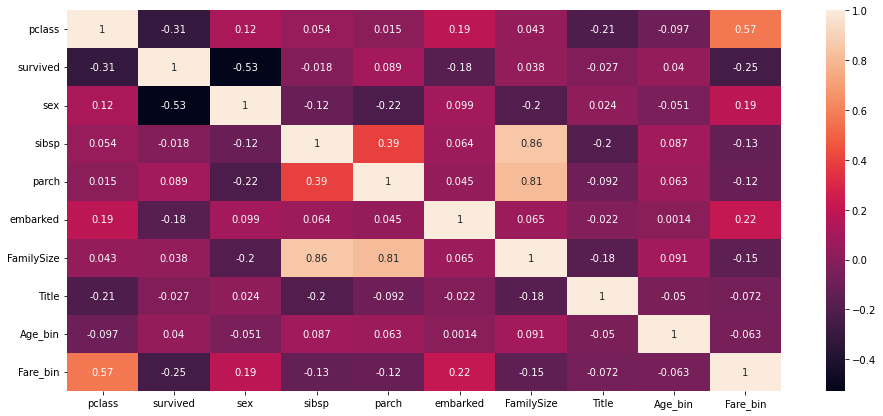

In [364]:
plt.figure(figsize = (16,7))
sns.heatmap(titanic_dataset_3.corr(),annot = True)
plt.show()

### titanic_dataset = original dataset;
### titanic_dataset_1 = data cleaned dataset;
### titanic_dataset_2 = data dummeid dataset from titanic_dataset_1;
### titanic_dataset_3 = data label encoded dataset from titanic_dataset_1;
### titanic_dataset_2_1 = bestKselected data from dataset_2;
### titanic_dataset_2_2 = decomposed data from dataset_2;
### titanic_dataset_3_1 = bestKselected data from dataset_3;
### titanic_dataset_3_2 = decomposed data from dataset_3;

In [365]:
print(titanic_dataset.shape)
print(titanic_dataset_1.shape)
print(titanic_dataset_2.shape)
print(titanic_dataset_3.shape)

(1310, 14)
(1306, 10)
(1306, 25)
(1306, 10)


In [366]:
X_2 = titanic_dataset_2.drop("survived",axis = 1)
y_2 = titanic_dataset_2["survived"]

X_3 = titanic_dataset_3.drop("survived",axis = 1)
y_3 = titanic_dataset_3["survived"]

In [367]:
print(X_2.shape,y_2.shape)
print(X_3.shape,y_3.shape)

(1306, 24) (1306,)
(1306, 9) (1306,)


In [368]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

In [369]:
select_best_2 = SelectKBest(chi2, k = 20)

In [370]:
titanic_dataset_2_1 = select_best_2.fit_transform(X_2,y_2)

In [371]:
(select_best_2.scores_)

array([6.78091551e+01, 8.27853145e-01, 1.90002663e+01, 4.89544135e+00,
       2.34067793e+02, 1.28987477e+02, 4.16255445e+00, 9.73384185e+01,
       1.53158677e+02, 1.37297153e+02, 4.94980948e-04, 1.48650993e+01,
       4.48983797e-02, 2.28592809e+00, 1.95806588e-01, 3.47454504e+01,
       2.90223520e-01, 9.04663654e+00, 1.48914850e+01, 3.82482072e+01,
       2.31213245e+01, 3.01905948e+00, 3.21722960e+00, 1.40914742e+01])

In [372]:
titanic_dataset_2_1.shape

(1306, 20)

In [373]:
select_best_3 = SelectKBest(chi2, k = 7)

In [374]:
titanic_dataset_3_1 = select_best_3.fit_transform(X_3,y_3)

In [375]:
select_best_3.scores_

array([ 67.80915511, 128.98747721,   0.82785314,  19.00026633,
        18.0841478 ,   4.89544135,   0.30797655,   3.6661878 ,
        19.9262953 ])

In [376]:
titanic_dataset_3_1.shape

(1306, 7)

In [377]:
pca_2 = PCA(n_components = 16)
titanic_dataset_2_2 = pca_2.fit_transform(X_2,y_2)
pca_3 = PCA(n_components = 6)
titanic_dataset_3_2 = pca_3.fit_transform(X_3,y_3)

In [378]:
print(titanic_dataset_2_2.shape,titanic_dataset_3_2.shape)

(1306, 16) (1306, 6)


In [379]:
X_1 = titanic_dataset_1.drop("survived",axis = 1)
X_2 = titanic_dataset_2.drop("survived",axis = 1)
X_3 = titanic_dataset_3.drop("survived",axis = 1)
X_2_1 = titanic_dataset_2_1
X_2_2 = titanic_dataset_2_2
X_3_1 = titanic_dataset_3_1
X_3_2 = titanic_dataset_3_2

In [380]:
print(X_1.shape)
print(X_2.shape,X_2_1.shape,X_2_2.shape)
print(X_3.shape,X_3_1.shape,X_3_2.shape)

(1306, 9)
(1306, 24) (1306, 20) (1306, 16)
(1306, 9) (1306, 7) (1306, 6)


In [381]:
y_2.head(),y_3.head()

(0    1
 1    1
 2    0
 3    0
 4    0
 Name: survived, dtype: int64,
 0    1
 1    1
 2    0
 3    0
 4    0
 Name: survived, dtype: int64)

In [382]:
y = y_2

In [383]:
X_2.head()

,pclass,sibsp,parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Age_type_Elder,Embark_type_C,Embark_type_Q,Embark_type_S,Fare_type_very_low_fare,Fare_type_low_fare,Fare_type_average_fare,Fare_type_above_average_fare,Fare_type_high_fare,Fare_type_very_high_fare
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,2,3,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,2,3,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,2,3,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,2,3,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [384]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

0.7653256704980843
0.8396946564885496
0.7587022900763358


<AxesSubplot:>

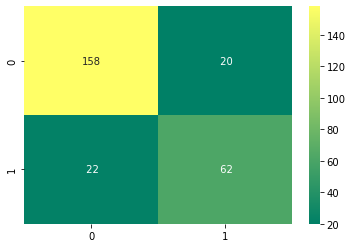

In [418]:
lr_1 = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X_1,y_2,test_size = 0.2,random_state = 5)
lr_1.fit(x_train,y_train)
pred1 = lr_1.predict(x_train)
pred2 = lr_1.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(lr_1,X_1,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8065134099616859
0.8320610687022901
0.780857310628303


<AxesSubplot:>

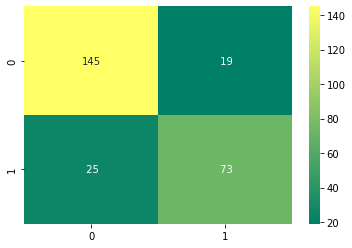

In [386]:
lr_2 = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X_2,y_2,test_size = 0.2,random_state = 1)
lr_2.fit(x_train,y_train)
pred1 = lr_2.predict(x_train)
pred2 = lr_2.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(lr_2,X_2,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.7854406130268199
0.7977099236641222
0.7587022900763358


<AxesSubplot:>

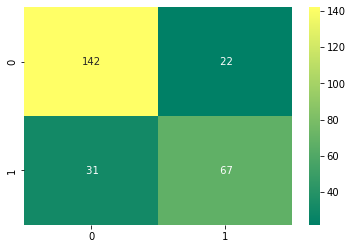

In [387]:
lr_3 = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X_3,y_2,test_size = 0.2,random_state = 1)
lr_3.fit(x_train,y_train)
pred1 = lr_3.predict(x_train)
pred2 = lr_3.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(lr_3,X_3,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8065134099616859
0.8244274809160306
0.7587022900763358


<AxesSubplot:>

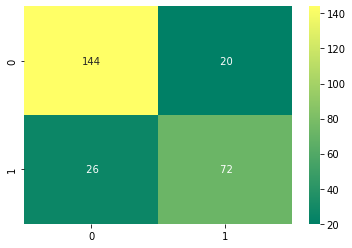

In [388]:
lr_2_1 = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X_2_1,y_2,test_size = 0.2,random_state = 1)
lr_2_1.fit(x_train,y_train)
pred1 = lr_2_1.predict(x_train)
pred2 = lr_2_1.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(lr_2_1,X_1,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8084291187739464
0.8358778625954199
0.7747445684086907


<AxesSubplot:>

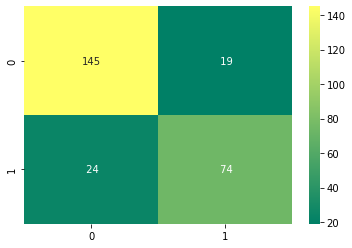

In [389]:
lr_2_2 = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X_2_2,y_2,test_size = 0.2,random_state = 1)
lr_2_2.fit(x_train,y_train)
pred1 = lr_2_2.predict(x_train)
pred2 = lr_2_2.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(lr_2_2,X_2_2,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.7816091954022989
0.7977099236641222
0.7663652378156195


<AxesSubplot:>

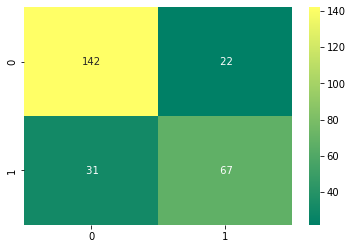

In [291]:
lr_3_1 = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X_3_1,y_2,test_size = 0.2,random_state = 1)
lr_3_1.fit(x_train,y_train)
pred1 = lr_3_1.predict(x_train)
pred2 = lr_3_1.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(lr_3_1,X_3_1,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.6848659003831418
0.683206106870229
0.6690780974750441


<AxesSubplot:>

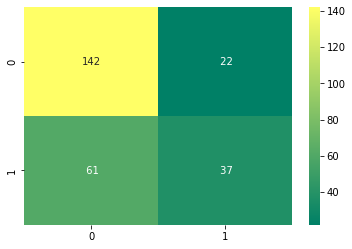

In [292]:
lr_3_2 = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(X_3_2,y_2,test_size = 0.2,random_state = 1)
lr_3_2.fit(x_train,y_train)
pred1 = lr_3_2.predict(x_train)
pred2 = lr_3_2.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(lr_3_2,X_3_2,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.7998084291187739
0.8740458015267175
0.7985085143863769


<AxesSubplot:>

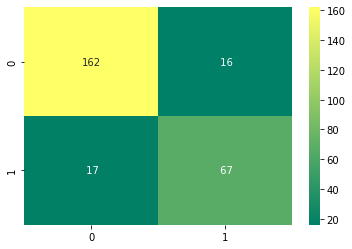

In [414]:
svc_1 = SVC()
x_train,x_test,y_train,y_test = train_test_split(X_1,y_2,test_size = 0.2,random_state = 5)
svc_1.fit(x_train,y_train)
pred1 = svc_1.predict(x_train)
pred2 = svc_1.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(svc_1,X_1,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8160919540229885
0.8282442748091603
0.7830886670581327


<AxesSubplot:>

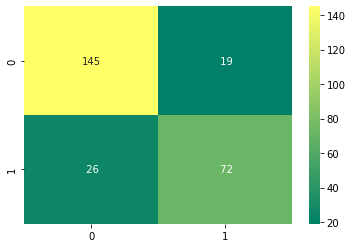

In [408]:
svc_2 = SVC()
x_train,x_test,y_train,y_test = train_test_split(X_2,y_2,test_size = 0.2,random_state = 1)
svc_2.fit(x_train,y_train)
pred1 = svc_2.predict(x_train)
pred2 = svc_2.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(svc_2,X_2,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8122605363984674
0.8244274809160306
0.7985085143863769


<AxesSubplot:>

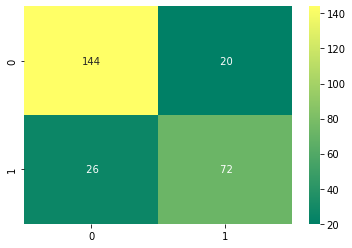

In [413]:
svc_3 = SVC()
x_train,x_test,y_train,y_test = train_test_split(X_3,y_2,test_size = 0.2,random_state = 1)
svc_3.fit(x_train,y_train)
pred1 = svc_3.predict(x_train)
pred2 = svc_3.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(svc_3,X_3,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8160919540229885
0.8320610687022901
0.7838578978273635


<AxesSubplot:>

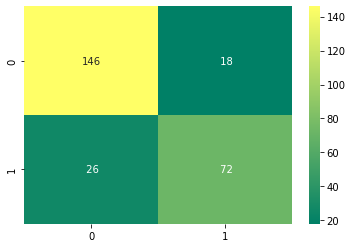

In [406]:
svc_2_1 = SVC()
x_train,x_test,y_train,y_test = train_test_split(X_2_1,y_2,test_size = 0.2,random_state = 1)
svc_2_1.fit(x_train,y_train)
pred1 = svc_2_1.predict(x_train)
pred2 = svc_2_1.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(svc_2_1,X_2_1,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8170498084291188
0.8587786259541985
0.7563123899001762


<AxesSubplot:>

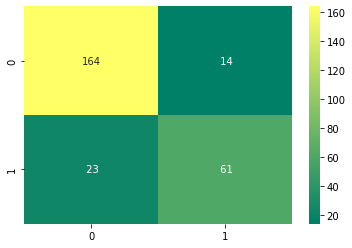

In [405]:
svc_2_2 = SVC()
x_train,x_test,y_train,y_test = train_test_split(X_2_2,y_2,test_size = 0.2,random_state = 5)
svc_2_2.fit(x_train,y_train)
pred1 = svc_2_2.predict(x_train)
pred2 = svc_2_2.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(svc_2_2,X_2_2,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.7959770114942529
0.8053435114503816
0.7824251321197886


<AxesSubplot:>

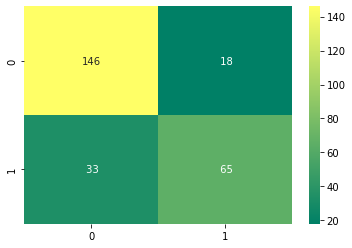

In [403]:
svc_3_1 = SVC()
x_train,x_test,y_train,y_test = train_test_split(X_3_1,y_2,test_size = 0.2,random_state = 1)
svc_3_1.fit(x_train,y_train)
pred1 = svc_3_1.predict(x_train)
pred2 = svc_3_1.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(svc_3_1,X_3_1,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.7873563218390804
0.732824427480916
0.734286553141515


<AxesSubplot:>

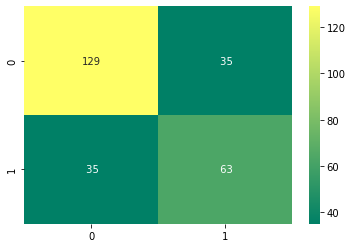

In [404]:
svc_3_2 = SVC()
x_train,x_test,y_train,y_test = train_test_split(X_3_2,y_2,test_size = 0.2,random_state = 1)
svc_3_2.fit(x_train,y_train)
pred1 = svc_3_2.predict(x_train)
pred2 = svc_3_2.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(svc_3_2,X_3_2,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8630268199233716
0.7786259541984732
0.7386376981796829


<AxesSubplot:>

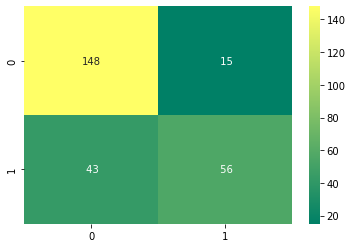

In [400]:
rf_1 = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(X_1,y_2,test_size = 0.2,random_state = 2)
rf_1.fit(x_train,y_train)
pred1 = rf_1.predict(x_train)
pred2 = rf_1.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(rf_1,X_1,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8563218390804598
0.8320610687022901
0.7340575455079272


<AxesSubplot:>

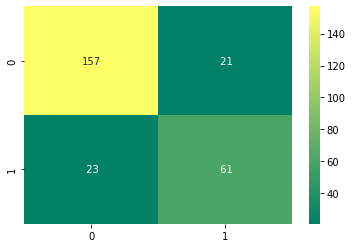

In [402]:
rf_2 = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(X_2,y_2,test_size = 0.2,random_state = 5)
rf_2.fit(x_train,y_train)
pred1 = rf_2.predict(x_train)
pred2 = rf_2.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(rf_2,X_2,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8563218390804598
0.8320610687022901
0.7355901350557839


<AxesSubplot:>

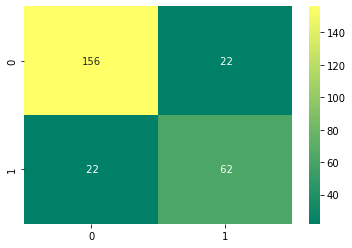

In [301]:
rf_3 = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(X_3,y_2,test_size = 0.2,random_state = 5)
rf_3.fit(x_train,y_train)
pred1 = rf_3.predict(x_train)
pred2 = rf_3.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(rf_3,X_3,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8553639846743295
0.8396946564885496
0.7340516735173224


<AxesSubplot:>

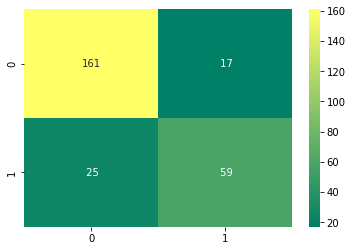

In [302]:
rf_2_1 = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(X_2_1,y_2,test_size = 0.2,random_state = 5)
rf_2_1.fit(x_train,y_train)
pred1 = rf_2_1.predict(x_train)
pred2 = rf_2_1.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(rf_2_1,X_2_1,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8563218390804598
0.8396946564885496
0.7371109806224311


<AxesSubplot:>

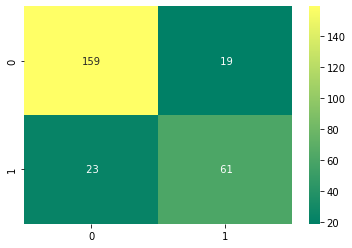

In [303]:
rf_2_2 = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(X_2_2,y_2,test_size = 0.2,random_state = 5)
rf_2_2.fit(x_train,y_train)
pred1 = rf_2_2.predict(x_train)
pred2 = rf_2_2.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(rf_2_2,X_2_2,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8515325670498084
0.8244274809160306
0.7348502642395773


<AxesSubplot:>

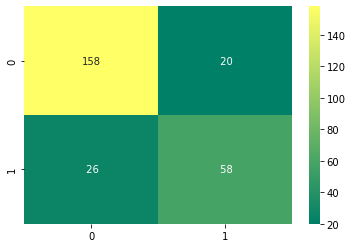

In [304]:
rf_3_1 = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(X_3_1,y_2,test_size = 0.2,random_state = 5)
rf_3_1.fit(x_train,y_train)
pred1 = rf_3_1.predict(x_train)
pred2 = rf_3_1.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(rf_3_1,X_3_1,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

0.8563218390804598
0.8091603053435115
0.7081033470346447


<AxesSubplot:>

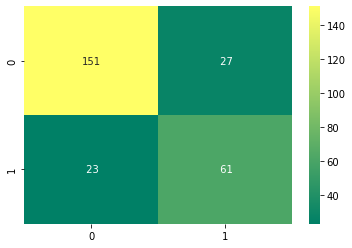

In [306]:
rf_3_2 = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(X_3_2,y_2,test_size = 0.2,random_state = 5)
rf_3_2.fit(x_train,y_train)
pred1 = rf_3_2.predict(x_train)
pred2 = rf_3_2.predict(x_test)
print(accuracy_score(y_train,pred1))
print(accuracy_score(y_test,pred2))

print(cross_val_score(rf_3_2,X_3_2,y_2,cv = 10).mean())

sns.heatmap(confusion_matrix(y_test,pred2),annot = True,fmt = "3.0f",cmap = "summer")

# Conclusion

## From above data the best validating score is 0.7985 by SVC from 1 and 3rd datasets

In [411]:
print(cross_val_score(svc_1,X_1,y_2,cv = 10).mean())
print(cross_val_score(svc_3,X_3,y_2,cv = 10).mean())

0.7985085143863769
0.7985085143863769


In [412]:
print(cross_val_score(svc_1,X_1,y_2,cv = 15).mean())
print(cross_val_score(svc_3,X_3,y_2,cv = 15).mean())

0.8039794496691047
0.8039794496691047


In [415]:
print(cross_val_score(svc_1,X_1,y_2,cv = 20).mean())
print(cross_val_score(svc_3,X_3,y_2,cv = 20).mean())

0.8046037296037296
0.8046037296037296


## So it is best to use either dataset with SVC model